In [1]:
"""
seaborn系列 (11) | 小提琴图violinplot() 原创
脑机接口社区2022-01-24 18:18:51博主文章分类：数据分析与可视化

小提琴图
该函数是用来绘制箱形图和核密度估计组合图。

小提琴形图(violin plot)的作用与盒形图(box plot)和whidker plot的作用类似，它显示了一个或多个分类变量的几个级别的定量数据的分布，
我们可以通过观察来比较这些分布。与盒形图不同，因为盒形图的所有绘图组件都对应于实际数据点,小提琴形图具有底层分布的核密度估计。

函数原型
seaborn.violinplot(x=None, y=None, hue=None,
                   data=None, order=None, hue_order=None, 
                   bw='scott', cut=2, scale='area', scale_hue=True, 
                   gridsize=100, width=0.8, inner='box', split=False,
                   dodge=True, orient=None, linewidth=None,
                   color=None, palette=None, saturation=0.75,
                   ax=None, **kwargs)

参数解读

输入数据可以通过多种格式传递：
list、numpy数组、pandas
long-form DataFrame
wide-form DataFrame
在大多数情况下，可以使用numpy或Python对象，
但推荐使用pandas对象，因为关联的名称将用于注释轴。
此外，使用分类类型来分组变量来控制绘图元素的顺序。

可选：
x,y,hue:数据字段变量名(如上表，date,name,age,sex为数据字段变量名)
用于绘制数据的输入

data: DataFrame,数组或数组列表
用于绘图的数据集，如果x和y不存在，则将其解释为 wide-form,否则它被认为是 long-form

order, hue_order:字符串列表
指定绘制分类级别，否则从数据对象推断级别

bw：{'scott'，'silverman'，float}
计算内核带宽时使用的引用规则的名称或比例因子。
实际内核大小将通过将比例因子乘以每个bin中数据的标准差来确定。

cut:float
以带宽大小为单位的距离，用于将密度扩展到超过极端数据点。
设置为0可将小提琴范围限制在观测数据范围内
（即，与ggplot中的trim=true具有相同的效果）。

scale：{“area”，“count”，“width”}
用于缩放每个小提琴宽度。如果是区域，每个小提琴都会有相同的区域。
如果计数，小提琴的宽度将按照该箱中的观察次数进行缩放。
如果宽度，每个小提琴将具有相同的宽度

gridsize：int
用于计算核密度估计的离散网格中的点数

inner:{'box'，'quartile'，'point'，'stick'，None}
表示小提琴内部的数据点。如果是框，画一个微型箱图。
如果是四分位数，则绘制分布的四分位数。如果point或stick，
则显示每个基础数据点。使用None将绘制未经修饰的小提琴

split : bool
当使用带有两个级别的变量的色调嵌套时，
将split设置为True将为每个级别绘制一半小提琴。这样可以更容易比较分布。

orient: v | h
图的显示方向(垂直或水平,即横向或纵向)，
这通常可以从输入变量的dtype推断得到

linewidth：float
构图元素的灰线宽度。

palette：调色板名称,list列表，dict字典
用于对变量调不同级别的颜色

saturation(饱和度)：float
用于绘制颜色的原始饱和度的比例，如果希望绘图颜色与输入颜色规格完美匹配，
则将其设置为1

dodge:bool
使用色调嵌套时，是否应沿分类轴移动元素。
-----------------------------------
©著作权归作者所有：来自51CTO博客作者脑机接口社区的原创作品，请联系作者获取转载授权，否则将追究法律责任
seaborn系列 (11) |  小提琴图violinplot()
https://blog.51cto.com/u_6811786/4967863
"""
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#设置风格
sns.set(style="whitegrid")
# 构建数据
tips = sns.load_dataset("tips", data_home='./seaborn-data', cache=True)

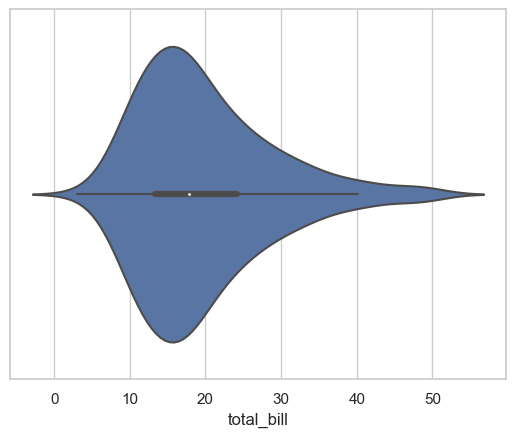

In [2]:
"""
案例1：
绘制一个水平的小提琴形图
"""
sns.violinplot(x=tips['total_bill'])
plt.show()

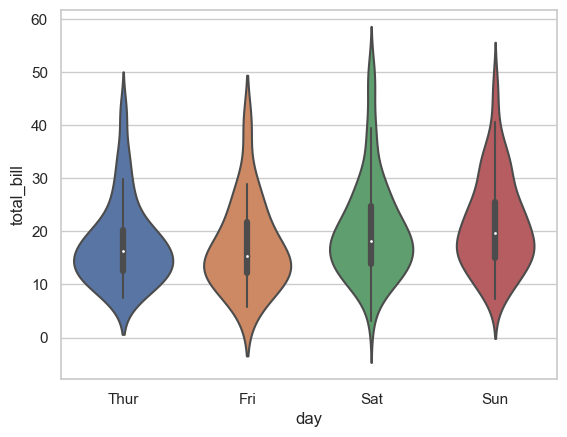

In [3]:
"""
案例2：
绘制一个按分类变量分组的垂直小提琴图
"""
sns.violinplot(x="day", y="total_bill", data=tips)
plt.show()

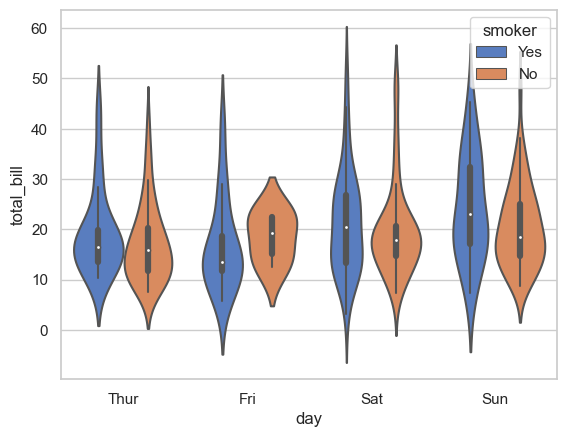

In [4]:
"""
案例3：
绘制 两类变量进行分组 绘制垂直方向的小提琴图
"""
sns.violinplot(x="day", y="total_bill", 
               hue="smoker",data=tips, palette="muted")
plt.show()

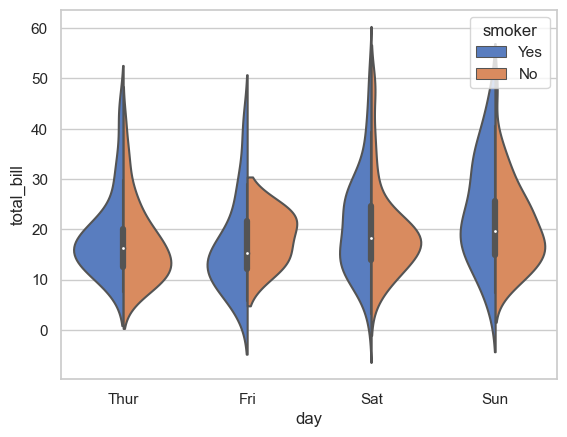

In [5]:
"""
案例4：
绘制分割小提琴以比较跨色调变量
"""
sns.violinplot(x="day", y="total_bill", hue="smoker",
               data=tips, palette="muted", split=True)
plt.show()

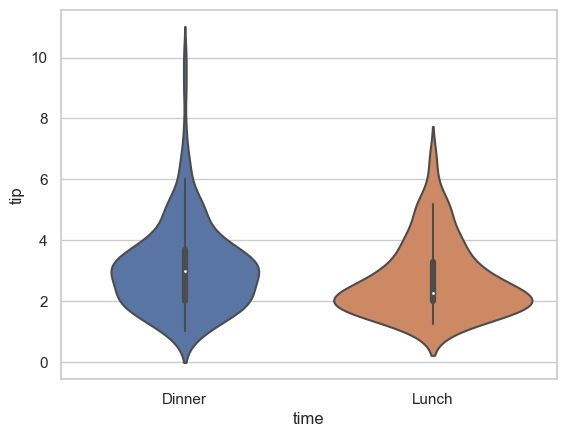

In [6]:
"""
案例5：
通过设置order来明确指出挑剔亲的顺序
"""
sns.violinplot(x="time", y="tip", 
               data=tips,order=["Dinner", "Lunch"])
plt.show()

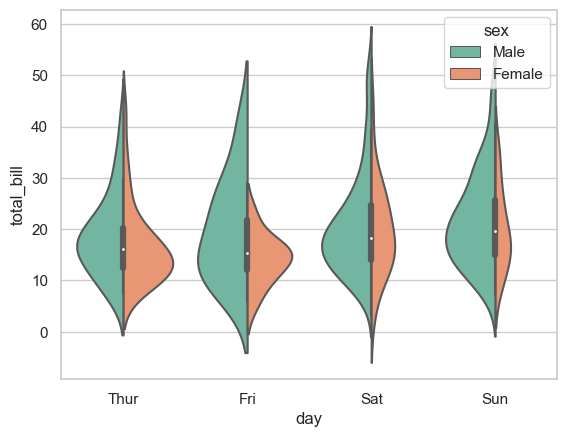

In [7]:
"""
案例6：
通过设置scale='count'，按每个箱子中的观察次数来缩放小提琴宽度
"""
sns.violinplot(x="day", y="total_bill", hue="sex",
               data=tips, palette="Set2",
               split=True,scale="count")
plt.show()

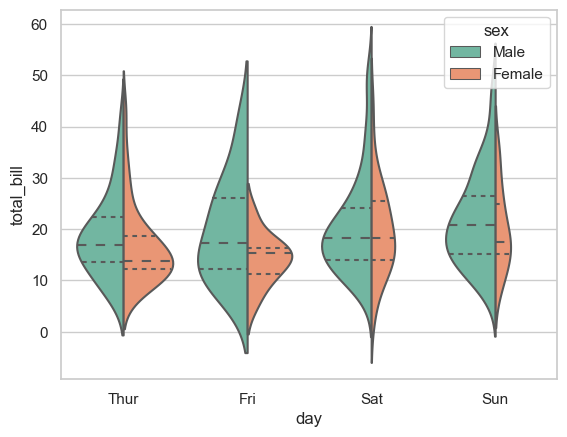

In [8]:
"""
案例7：
将四分位数绘制为水平线
"""
sns.violinplot(x="day", y="total_bill", hue="sex",
               data=tips, palette="Set2", split=True,
               scale="count", inner="quartile")
plt.show()

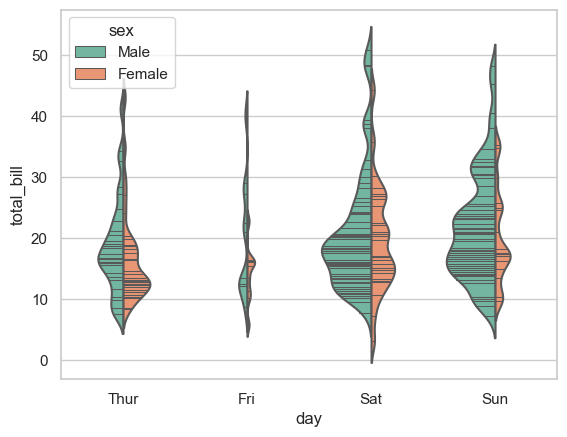

In [9]:
"""
案例8：
使用窄的宽度来减少平滑量
"""
sns.violinplot(x="day", y="total_bill", hue="sex",
               data=tips, palette="Set2", split=True,
               scale="count", inner="stick",
               scale_hue=False, bw=.2)
plt.show()

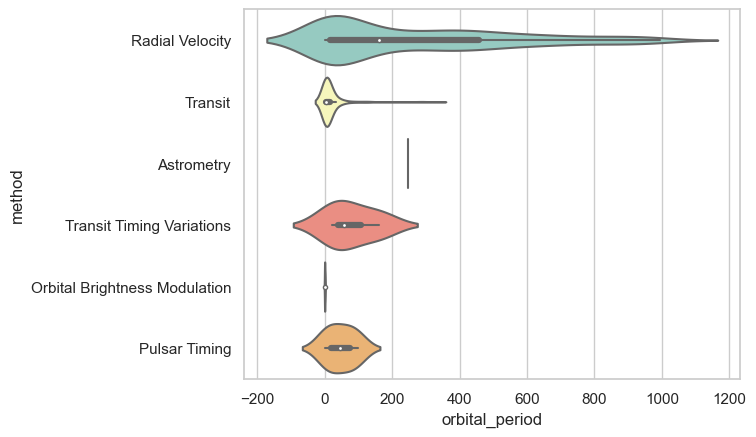

In [10]:
"""
案例9：
将小提琴图绘制成水平方向上
"""
# 读取数据
planets = sns.load_dataset("planets", data_home='./seaborn-data', cache=True)
sns.violinplot(x="orbital_period", y="method",
               data=planets[planets.orbital_period < 1000],
               scale="width", palette="Set3")
plt.show()

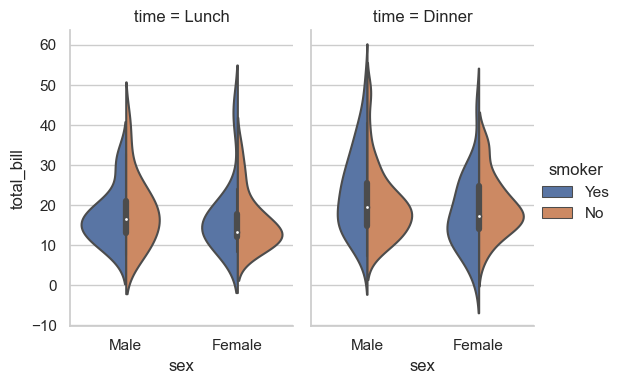

In [11]:
"""
案例10：
使用catplot()violinplot()的统计效果，必须设置kind="violin"
当要对其他分类变量进行分组时，使用catplot()比直接使用FacetGrid更加安全
"""
sns.catplot(x="sex", y="total_bill",
            hue="smoker", col="time",
            data=tips, kind="violin", split=True,
            height=4, aspect=.7);
